**Resistencia a compresi√≥n del concreto**

Uno de los factores m√°s importantes, desde mi humilde punto de vista, en la ingenier√≠a civil es conocer la resistencia a la compresi√≥n del concreto. Este valor se utiliza en todos los c√°lculos para el dise√±o estructural de obras en concreto reforzado, ya que garantiza principalmente la seguridad frente a las solicitaciones que experimenta la estructura.
Pero, ¬øes f√°cil obtener este valor? ¬øDe qu√© depende? ¬øPodemos usar redes neuronales para predecirlo e intentar ser m√°s eficientes al dise√±ar una mezcla?

El estado del arte y los a√±os de experiencia nos han demostrado que la resistencia final a compresi√≥n del concreto depende cr√≠ticamente de la microestructura resultante del proceso de hidrataci√≥n del cemento. Por ende, el agua juega un papel fundamental en el dise√±o de la mezcla. En esencia, la resistencia m√°xima est√° relacionada con la cantidad y distribuci√≥n del gel C‚ÄìS‚ÄìH formado, as√≠ como con la porosidad remanente en la matriz de pasta. Es evidente, entonces, que el concreto debe tener una porosidad adecuada, lo cual resulta saludable desde el punto de vista estructural. Una de las razones principales es que permite crear espacio para encapsular agua, evitando as√≠ esfuerzos negativos generados por su presencia.

Evidentemente, seg√∫n la teor√≠a del gel-espacio, la resistencia œÉ del concreto depende del cociente gel/espacio (es decir, gel de hidrataci√≥n frente al volumen total no gel), el cual est√° determinado, a su vez, por el grado de hidrataci√≥n del cemento y por la relaci√≥n agua/cemento (w/c).

Para profundizar en este an√°lisis, es importante mencionar la ecuaci√≥n de Powers, a partir de la cual se pueden extraer algunas conclusiones:

La cl√°sica ley de Powers muestra que œÉ se escala como (gel/espacio)^n, con un exponente n ‚âà 0.8‚Äì1.

En t√©rminos pr√°cticos, esto significa que, a igualdad de w/c, aumentar la cantidad de cemento (es decir, m√°s gel potencial) eleva la resistencia, aunque de forma no lineal.

Un cemento con mayor contenido de C‚ÇÉS reactivo o con una mayor finura producir√° una mayor ‚Äúfuerza intr√≠nseca‚Äù Œ≤ dentro del modelo de Powers, lo cual incrementa la resistencia de la pasta.

(Wang, 2017).



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_excel("Concrete_Data.xls")
data.head()

Cement   Blast Furnace Slag   Fly Ash   Water    Superplasticizer   \
0    540.0                  0.0       0.0    162.0                2.5   
1    540.0                  0.0       0.0    162.0                2.5   
2    332.5                142.5       0.0    228.0                0.0   
3    332.5                142.5       0.0    228.0                0.0   
4    198.6                132.4       0.0    192.0                0.0   

   Coarse Aggregate   Fine Aggregate  Age        f¬¥c   
0             1040.0           676.0    28  79.986111  
1             1055.0           676.0    28  61.887366  
2              932.0           594.0   270  40.269535  
3              932.0           594.0   365  41.052780  
4              978.4           825.5   360  44.296075

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   Blast Furnace Slag   1030 non-null   float64
 2   Fly Ash              1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   Coarse Aggregate     1030 non-null   float64
 6   Fine Aggregate       1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   f¬¥c                  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


La base de datos que estoy utilizando en este art√≠culo es p√∫blica y la encontr√© en la p√°gina del UC Irvine Machine Learning Repository. Esta fuente ha despertado en m√≠ un gran inter√©s por desarrollar una red neuronal y evaluar su eficiencia.
Observ√© que cuento con 1.030 casos, en los cuales se relacionan las variables t√≠picas involucradas en el dise√±o de mezclas de concreto.

1. Es importante se√±alar que no hay datos nulos, lo verificar√© mediante una l√≠nea de c√≥digo que no hayand datos repetidos.



In [21]:
#Filas repetidas en los registros
print(f"Tama√±o del dataset antes de eliminar duplicados: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Tama√±o del dataset despu√©s de eliminar duplicados: {data.shape}")

Tama√±o del dataset antes de eliminar duplicados: (1030, 9)
Tama√±o del dataset despu√©s de eliminar duplicados: (1005, 9)


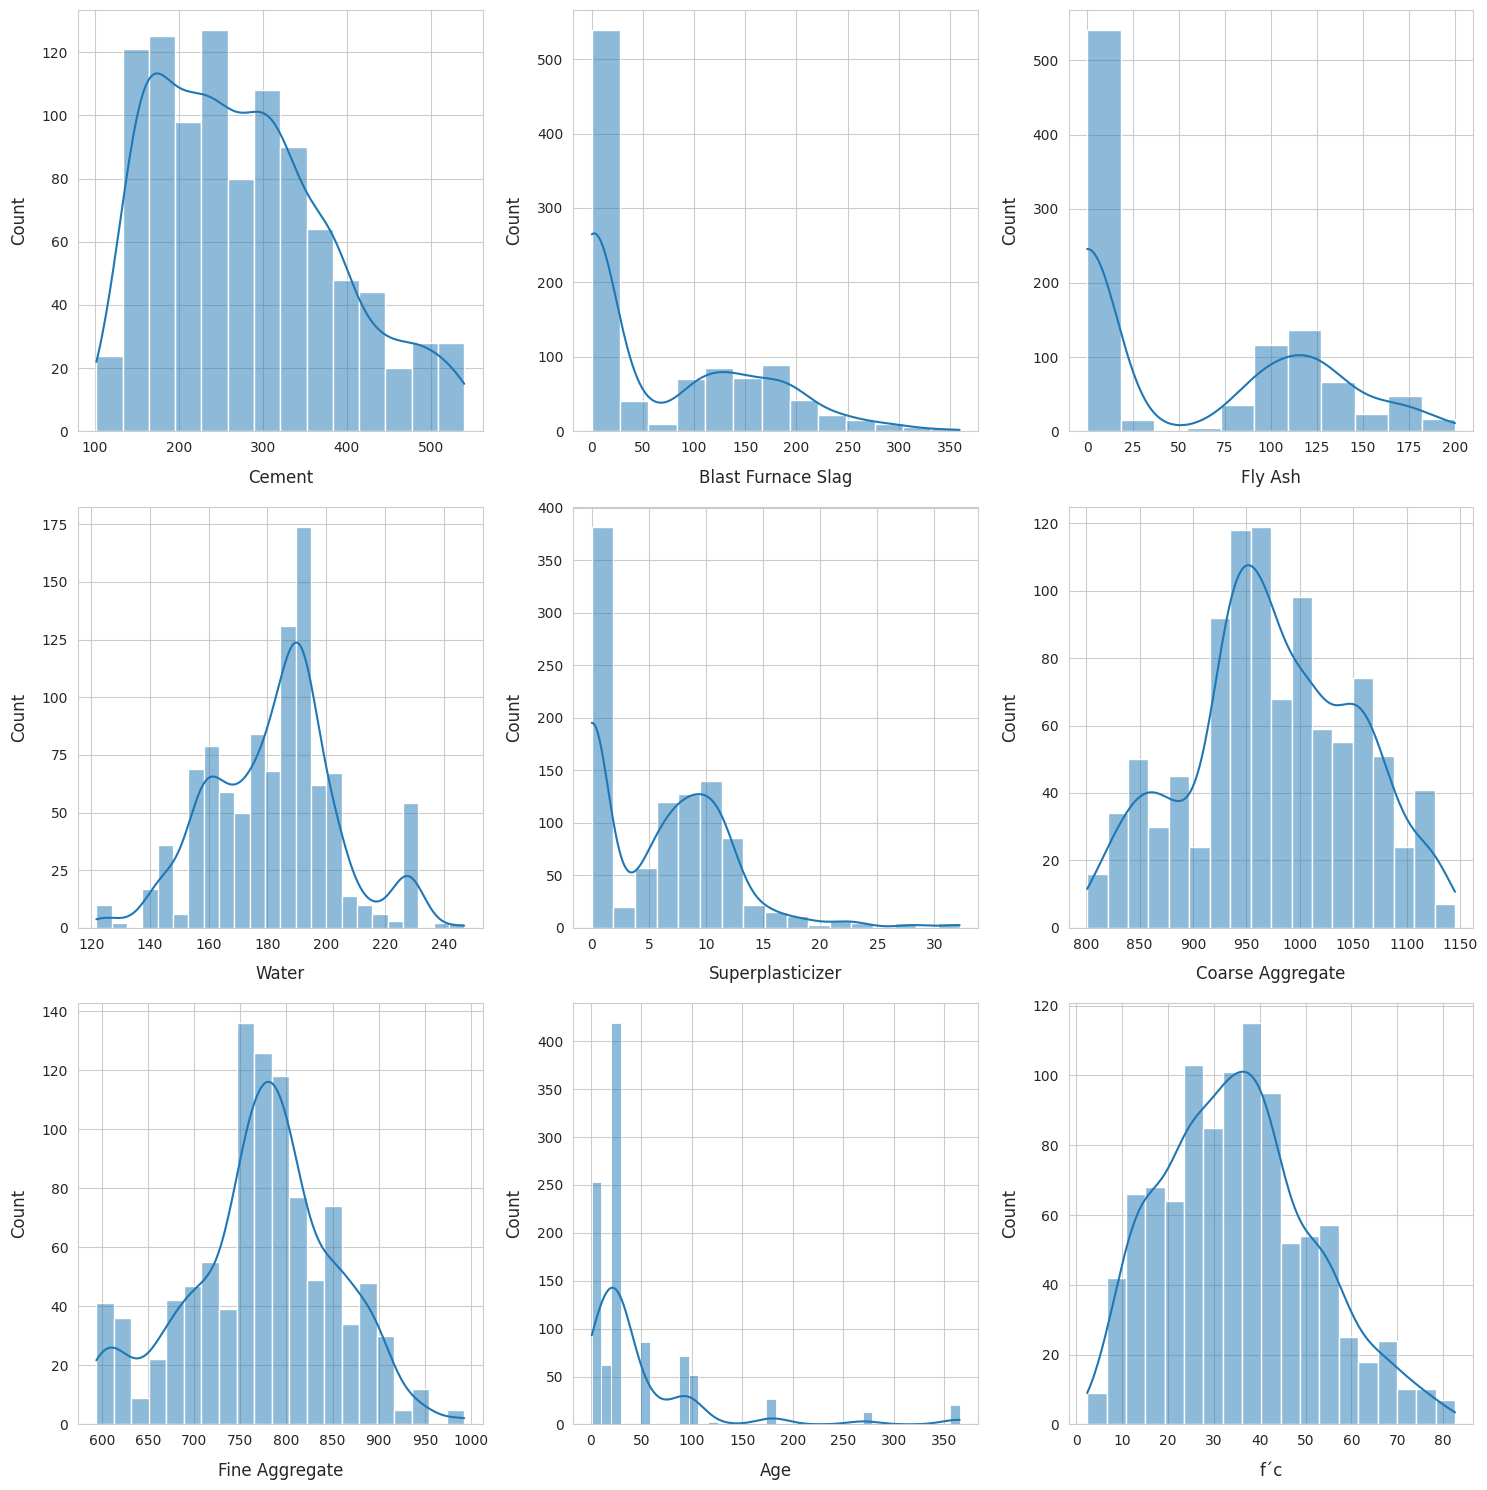

In [22]:
data.columns = data.columns.str.strip()


f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False, sharey=False)


sns.histplot(data['Cement'], ax=axes[0, 0], kde=True)
sns.histplot(data['Blast Furnace Slag'], ax=axes[0, 1], kde=True)
sns.histplot(data['Fly Ash'], ax=axes[0, 2], kde=True)
sns.histplot(data['Water'], ax=axes[1, 0], kde=True)
sns.histplot(data['Superplasticizer'], ax=axes[1, 1], kde=True)
sns.histplot(data['Coarse Aggregate'], ax=axes[1, 2], kde=True)
sns.histplot(data['Fine Aggregate'], ax=axes[2, 0], kde=True)
sns.histplot(data['Age'], ax=axes[2, 1], kde=True)
sns.histplot(data["f¬¥c"], ax=axes[2, 2], kde=True)

plt.tight_layout()
plt.show()


Obviamente, de estos gr√°ficos podemos sacar conclusiones muy interesantes, pero como el objetivo es crear una red neuronal para la predicci√≥n de f'c, no entrar√© en mucho detalle y me centrar√© en lo m√°s relevante.

üìå 1. Cemento
La mayor√≠a de las mezclas en la base de datos est√°n dentro de un rango t√≠pico de dosificaci√≥n, lo cual podr√≠a generar sesgos al "entrar el modelo" por falta de datos. La distribuci√≥n del cemento es aproximadamente normal, con un ligero sesgo hacia la derecha, centrada en torno a los 300 kg/m¬≥.

üìå 2. Escoria de alto horno (Blast Furnace Slag) y cenizas volantes (Fly Ash)
Ambos presentan distribuciones altamente sesgadas a la derecha, con un gran n√∫mero de muestras que tienen contenido nulo o muy bajo, lo cual puede sesgar el aprendizaje. Es importante normalizar la muestra antes de ingresarla a la red neuronal. Esto indica que muchos concretos no contienen estos materiales cementantes suplementarios (SCM). Sin embargo, su inclusi√≥n (en niveles moderados) ha demostrado mejorar la resistencia a edades posteriores debido a reacciones puzol√°nicas y latentes (Thomas, 2007).

üìå 3. Agua
La distribuci√≥n es m√°s sim√©trica, centrada alrededor de 180 kg/m¬≥. El contenido de agua afecta directamente la relaci√≥n agua/cemento (w/c), que es uno de los factores m√°s influyentes en la resistencia del concreto (Neville, 2011). A mayor contenido de agua para un mismo contenido de cemento, la resistencia disminuye.

üìå 4. Superplastificante
Presenta un sesgo marcado a la derecha, lo que indica que en muchas mezclas no se utiliza aditivo o se usa en bajas cantidades. Sin embargo, su uso permite reducir el contenido de agua sin afectar la trabajabilidad, lo que conduce a mezclas con menor relaci√≥n agua/cemento y, por lo tanto, mayor resistencia (Domone, 2008).

üìå 5. Agregado Grueso y Fino
Ambos muestran distribuciones normales, lo cual es esperable, ya que la mayor√≠a de las mezclas de concreto se dise√±an para tener proporciones equilibradas. El contenido de agregados afecta la trabajabilidad, la relaci√≥n pasta/aglomerante y la zona de transici√≥n interfacial (ITZ), siendo esta √∫ltima un punto cr√≠tico en la resistencia (Mindess et al., 2003).

üìå 6. Edad del concreto
El histograma muestra una gran concentraci√≥n de datos en los primeros 28 d√≠as, lo cual es esperable, dado que esta edad es el est√°ndar para medir f'c. Sin embargo, tambi√©n se observan valores hasta 365 d√≠as. Esto es relevante porque la resistencia del concreto no se desarrolla de forma lineal con el tiempo: el crecimiento es r√°pido en los primeros d√≠as y luego desacelera (Taylor, 1997).

üìå 7. Resistencia a compresi√≥n (f'c)
La variable objetivo tiene una distribuci√≥n bastante sim√©trica, centrada alrededor de 35 MPa, con un rango entre 5 y 80 MPa. Esta amplia dispersi√≥n refuerza la necesidad de considerar m√∫ltiples variables en conjunto, ya que la resistencia no depende de un solo insumo, sino de interacciones complejas entre varios factores.

In [23]:
plt.figure(figsize=(10,10)) #se ajustar√° el tama√±o de la figura

ax=sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap="viridis") #se crear√° un mapa de calor de la correlaci√≥n de los datos

Hay algunas conclusiones importantes que vale la pena resaltar, y a continuaci√≥n dar√© mi humilde punto de vista al respecto.

Los agregados tienen poca o nula correlaci√≥n con f'c
Esto sugiere que su efecto en la resistencia no es ni lineal ni dominante, o est√° m√°s relacionado con propiedades indirectas como la zona de transici√≥n interfacial (ITZ), textura, forma o tama√±o.

Fly Ash y Blast Furnace Slag: correlaciones d√©biles con f'c
Esto puede deberse a que su efecto depende del tiempo: ganan fuerza a edades m√°s tard√≠as (m√°s all√° de 28 d√≠as), lo que aten√∫a la correlaci√≥n en general.



**¬øC√≥mo funciona el machine learning?**

A grandes rasgos ‚Äîporque este es un campo fascinante y bastante profundo‚Äî, te voy a explicar c√≥mo funciona el machine learning y c√≥mo, con conceptos b√°sicos, podemos construir una red neuronal.

Primero, es importante mencionar que una neurona artificial (como yo llamo a las neuronas utilizadas en redes de machine learning) funciona de manera similar a una neurona biol√≥gica.

Imagina que una persona tiene solo una neurona. Esto implicar√≠a que esa persona no podr√≠a tomar decisiones complejas, sino √∫nicamente decisiones binarias: por ejemplo, hace fr√≠o o hace calor, el carro es azul o rojo. Es evidente entonces que, para poder tomar decisiones m√°s complejas, necesitamos una red neuronal, capaz de captar y expresar m√∫ltiples se√±ales al mismo tiempo. Pero, ¬øc√≥mo funciona una neurona?

Todo empieza en las dendritas, que son las encargadas de recibir informaci√≥n y enviarla al n√∫cleo mediante impulsos el√©ctricos (paquetes de energ√≠a). Imagina ahora un d√≠a nublado y fr√≠o. Tus sentidos se activan y, a trav√©s de una red de neuronas, tu cuerpo trata de decidir si realmente tienes fr√≠o. Por ejemplo:

Vista: observas que el cielo est√° nublado y est√° lloviendo.

Tacto: al tocar una superficie, la sientes helada.

Olfato: no percibe ning√∫n cambio relevante.

Las dendritas recogen esta informaci√≥n y le asignan una importancia o peso. Por ejemplo, solo con el tacto no puedes estar seguro de que hace fr√≠o (porque tocar una nevera fr√≠a no significa que el ambiente est√© fr√≠o), as√≠ que le das un peso de 3/5. La vista, al mostrarte lluvia y nubes, tiene un peso de 5/5. El olfato no aporta en esta decisi√≥n, as√≠ que recibe un peso de 0.

El n√∫cleo procesa esa informaci√≥n ponderada. Imagina que suma los aportes:
(3/5 + 5/5 + 0/5) √∑ 2 = 4/5

Ese resultado (4/5) representa una alta probabilidad de que s√≠ est√° haciendo fr√≠o. Esa "respuesta" viaja entonces por el ax√≥n y llega al cuerpo, que reacciona: por ejemplo, decides ponerte una chaqueta.

Aclaro alo muy importante, este ejemplo corresponde a la abstracci√≥n matem√°tica de las neuronas artificiales, no a la fisiolog√≠a neuronal aut√©ntica, sin embargo, a grandes rasgos, as√≠ funciona el machine learning: queremos simular matem√°ticamente el comportamiento de una neurona para predecir un fen√≥meno ‚Äîf√≠sico o no‚Äî a partir de datos conocidos.
Entonces‚Ä¶ ¬øc√≥mo lo podemos hacer?



¬øC√≥mo podemos hacer una neurona artificial?

Lo primero que necesitamos son datos. Este campo fascinante depende de la calidad de los datos que puedas tener. Cada dato tendr√° un peso o una importancia asociada a la calidad de la variable para predecir el problema. Entonces, imagina que tengo una base de datos con
ùë•1, ùë•2, ùë•3, ùë•4 ... ùë•ùëõ, donde ùëõ es el n√∫mero de variables o caracter√≠sticas (features).

Por lo tanto, cada una de estas variables debe tener un peso asociado, el cual se relaciona con la importancia de la misma,
ùë§1, ùë§2, ùë§3, ùë§4
, ‚Ä¶, ùë§ùëõ
Por ende, nuestra primer conclusi√≥n es que Los pesos de interconexi√≥n w se utilizan para cuantificar la fuerza de las interconexiones; antes de que podamos sacar provecho de nuestra red neuronal es importante que esta aprenda o ser entrenada a partir de los datos entrada-salida se modifican lo pesos, ¬øves la importancia de w?

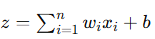

Observe, lector, que simplemente tendremos la sumatoria de cada una de las variables multiplicada por su peso m√°s un t√©rmino de sesgo ùëè. Esto no debe traer mayor problema al lector, ya que es simplemente la ecuaci√≥n de una recta con pendiente ùë§, pero con una gran utilidad ya que nos da la salida de cada nodo el cual podemos propagar hacia adelante.

Con este valor
ùëß, el n√∫cleo de la neurona ya puede tomar una decisi√≥n. Existen diversas funciones de activaci√≥n, pero para este caso utilizaremos la funci√≥n Swish, la cual funciona como una neurona sigmoide ponderada, lo que la vuelve muy efectiva a la hora de predecir. Pero, ¬øqu√© es una funci√≥n sigmoide? ¬øQu√© es una funci√≥n Swish?

En t√©rminos sencillos, la funci√≥n sigmoide ‚Äîo log√≠stica‚Äî transforma cualquier n√∫mero real en un valor entre 0 y 1, trazando una curva en forma de ‚ÄúS‚Äù. Su punto medio (cuando la entrada es 0) corta el eje‚ÄØY en 0,5, lo que nos permite interpretar directamente su salida como una probabilidad. As√≠, si la sigmoide devuelve un valor menor que 0,5, podemos asociarlo a la decisi√≥n ‚Äúno‚Äù; y si est√° por encima de 0,5, a la decisi√≥n ‚Äús√≠‚Äù. Esta propiedad de ‚Äúmapeo probabil√≠stico‚Äù facilita mucho las tareas de clasificaci√≥n y toma de decisiones en modelos de aprendizaje autom√°tico.

image.png




**¬øQu√© es la funci√≥n swish (x) ?**

La funci√≥n Swish es una activaci√≥n suave y no mon√≥tona propuesta por investigadores de Google en 2017 que mejora el flujo de gradientes y el rendimiento de redes profundas frente a funciones tradicionales como ReLU o sigmoide. Matem√°ticamente se define como
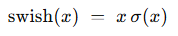
Donde œÉ(x) es la funci√≥n sigmoide.

 Al combinar linealidad y saturaci√≥n, Swish permite gradientes no nulos para valores negativos moderados y crece de forma m√°s gradual que ReLU para valores grandes, favoreciendo la optimizaci√≥n y la expresividad del modelo.

Al saber mas a detalle como funciona una neurona artifical, podemos ingresar mas a fondo, pues, el objetivo es poder crear no una neurona, si no una red neuronal (Artificial Neural Network, ANN). Est√° compuesto por capas de unidades (neuronas artificiales) interconectadas por aristas ponderadas, que transforman se√±ales de entrada en salidas mediante funciones de activaci√≥n diferenciables. Durante el entrenamiento, un algoritmo de retropropagaci√≥n ajusta estos pesos para minimizar un criterio de error sobre un conjunto de datos de entrenamiento, permitiendo a la red aproximar funciones complejas y realizar tareas como clasificaci√≥n o regresi√≥n.

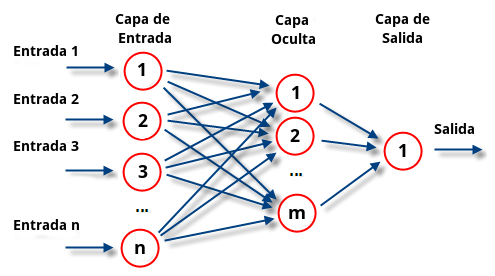



En una red neuronal artificial, tras la propagaci√≥n hacia adelante, se obtiene un vector de predicciones ùë¶^ = ùëì(ùëã;ùëä) a partir de los datos de entrada ùëã
y los pesos actuales ùëä mediante operaciones lineales y funciones de activaci√≥n en cada capa (swish)

Dado que en nuestro conjunto de entrenamiento disponemos de las etiquetas reales ùë¶, calculamos la funci√≥n de p√©rdida ùêø (ùë¶,ùë¶^) (por ejemplo, entrop√≠a cruzada o error cuadr√°tico medio) para cuantificar la discrepancia entre la salida de la red y el valor verdadero.

El objetivo del entrenamiento es minimizar el riesgo emp√≠rico sobre todos los ejemplos del conjunto de datos, definiendo as√≠ un problema de optimizaci√≥n supervisada.

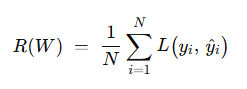

Para encontrar los pesos √≥ptimos, se emplea el m√©todo de descenso de gradiente, el cual usamos las derivadas ( ‚àÇJ/‚àÇw ) Para poder encontrar el camino de minima energia a la hora de modficar los pesos w.

image.png

A continuaci√≥n se muestra el script usado para estimar la resistencia del concreto. En √©l, implemento la funci√≥n de activaci√≥n Swish como parte del modelo de predicci√≥n.

Epoch 1/500
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 19ms/step - loss: 66.8702 - mae: 34.4335 - mse: 1443.0718 - val_loss: 71.3453 - val_mae: 36.6711 - val_mse: 1618.8983
Epoch 2/500
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 66.3439 - mae: 34.1704 - mse: 1437.4817 - val_loss: 70.9708 - val_mae: 36.4838 - val_mse: 1604.6654
Epoch 3/500
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 66.1292 - mae: 34.0630 - mse: 1401.7460 - val_loss: 70.5452 - val_mae: 36.2708 - val_mse: 1588.5776
Epoch 4/500
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 67.1959 - mae: 34.5963 - mse: 1462.2441 - val_loss: 70.0492 - val_mae: 36.0226 - val_mse: 1569.9810
Epoch 5/500
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 65.9277 - mae: 33.9622 - mse: 1410.6715 - val_loss: 69.4532 - val_mae: 35.7241 - val_mse: 1547.8323
Epoc

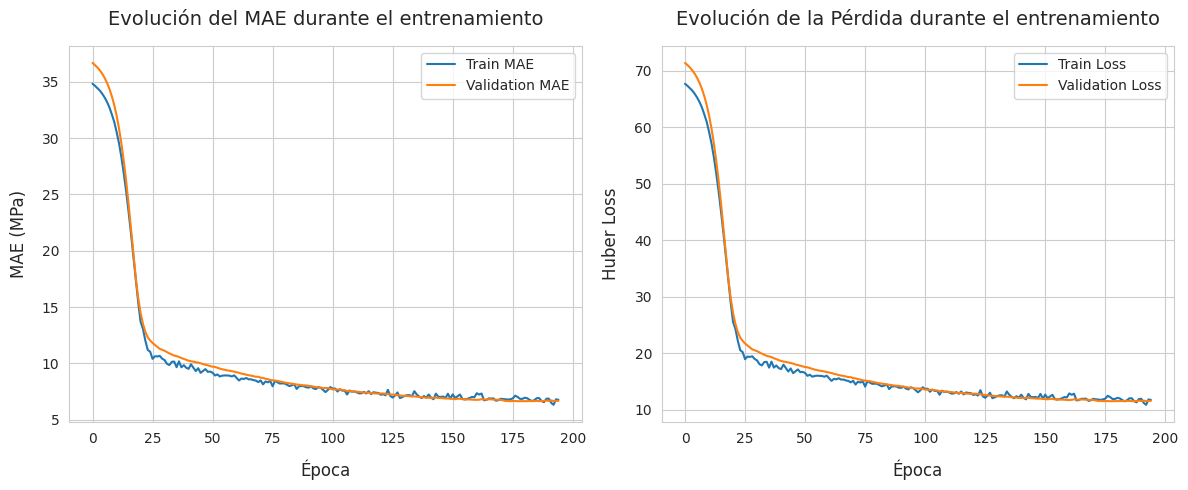

In [24]:
# Importar librer√≠as
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funci√≥n de activaci√≥n personalizada Swish
def swish(x):
    return x * tf.sigmoid(x)

# Funci√≥n para construir el modelo de predicci√≥n de resistencia
def build_concrete_model(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.BatchNormalization(),

        # Capa oculta 1
        layers.Dense(256, activation=swish,
                    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                    bias_initializer='glorot_uniform'),
        layers.Dropout(0.4),

        # Capa oculta 2
        layers.Dense(128, activation=swish,
                    kernel_initializer='he_normal'),

        # Capa de salida (regresi√≥n)
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Nadam(
        learning_rate=1e-4,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08
    )

    model.compile(
        loss=tf.keras.losses.Huber(delta=2.0),  # Delta ajustado para resistencia del concreto
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )
    return model

# Configuraci√≥n de early stopping
concrete_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    patience=20,
    min_delta=0.01,
    mode='min',
    restore_best_weights=True
)


# Separar caracter√≠sticas y objetivo
X = data.drop('f¬¥c', axis=1)
y = data['f¬¥c']

# Normalizaci√≥n de caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisi√≥n de datos (con shuffle para datos no temporales)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, shuffle=True, random_state=42
)

# Construir y entrenar el modelo
model = build_concrete_model((X_train.shape[1],))

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[concrete_early_stopping],
    verbose=1
)

# Evaluaci√≥n del modelo
def evaluate_concrete_model(model, X_test, y_test):
    results = model.evaluate(X_test, y_test)
    print("\nEvaluaci√≥n final:")
    print(f"- MAE: {results[1]:.3f} MPa")
    print(f"- MSE: {results[2]:.3f} MPa¬≤")
    print(f"- P√©rdida Huber: {results[0]:.3f}")

    # Predicciones y an√°lisis de error
    y_pred = model.predict(X_test)
    errors = np.abs(y_pred.flatten() - y_test)

    # M√©tricas adicionales
    print(f"\nError m√°ximo: {np.max(errors):.2f} MPa")
    print(f"Error promedio: {np.mean(errors):.2f} MPa")
    print(f"Rango objetivo: {np.min(y):.1f}-{np.max(y):.1f} MPa")

    # Porcentaje dentro de tolerancias comunes
    within_5mpa = np.sum(errors <= 5.0) / len(y_test)
    within_10pct = np.sum(errors <= 0.1 * y_test) / len(y_test)

    print(f"\nDentro de ¬±5 MPa: {within_5mpa*100:.1f}%")
    print(f"Dentro de ¬±10% del valor real: {within_10pct*100:.1f}%")

# Visualizaci√≥n del entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Evoluci√≥n del MAE durante el entrenamiento')
    plt.ylabel('MAE (MPa)')
    plt.xlabel('√âpoca')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Evoluci√≥n de la P√©rdida durante el entrenamiento')
    plt.ylabel('Huber Loss')
    plt.xlabel('√âpoca')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejecutar evaluaci√≥n y visualizaci√≥n
evaluate_concrete_model(model, X_test, y_test)
plot_training_history(history)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 


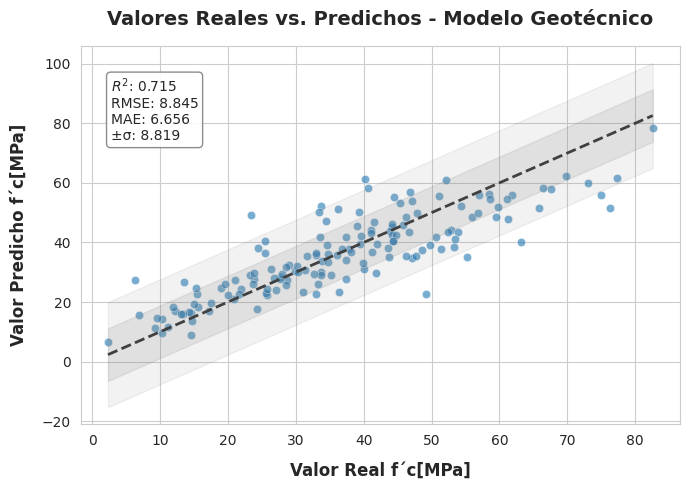

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predecir
y_pred = model.predict(X_test).flatten()

# Calcular m√©tricas
residuals = y_test - y_pred
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
std_residual = np.std(residuals)

# Estilo
sns.set_style("whitegrid")
sns.set_palette("tab10")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Gr√°fica
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=0.6,
    edgecolor='white',
    linewidth=0.5
)

# L√≠nea identidad
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='#404040', lw=2)

# Bandas ¬±œÉ y ¬±2œÉ
for n_std in [1, 2]:
    plt.fill_between(
        [min_val, max_val],
        [min_val - n_std * std_residual, max_val - n_std * std_residual],
        [min_val + n_std * std_residual, max_val + n_std * std_residual],
        color='gray',
        alpha=0.2 - 0.05 * n_std,
    )

# M√©tricas en caja de texto
metric_text = (
    f'$R^2$: {r2:.3f}\n'
    f'RMSE: {rmse:.3f}\n'
    f'MAE: {mae:.3f}\n'
    f'¬±œÉ: {std_residual:.3f}'
)
plt.gca().text(
    0.05, 0.75, metric_text,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round')
)

# Etiquetas
plt.xlabel('Valor Real f¬¥c[MPa]', fontweight='bold')
plt.ylabel('Valor Predicho f¬¥c[MPa]', fontweight='bold')
plt.title('Valores Reales vs. Predichos - Modelo Geot√©cnico', pad=15, fontweight='bold')

# Layout
plt.tight_layout()
plt.show()

Es evidente que se puede hacer uso de redes neuronales para predecir el comportamiento del concreto o, en este caso, calcular su resistencia a la compresi√≥n (f¬¥c). Es importante recordar que este valor no es lineal, y su no linealidad se incrementa con el aumento de la resistencia del concreto. Por lo tanto, encontrar una metodolog√≠a que permita obtener resultados m√°s precisos y facilite la predicci√≥n de la cantidad de materiales, o una mejor comprensi√≥n del funcionamiento del concreto, resulta esencial.

Sin embargo, ¬øexiste una forma m√°s precisa de predecir este valor?



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("Concrete_Data.xls")
print(data.columns.tolist())

data.head()

['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ', 'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate', 'Age ', 'f¬¥c ']


Cement   Blast Furnace Slag   Fly Ash   Water    Superplasticizer   \
0    540.0                  0.0       0.0    162.0                2.5   
1    540.0                  0.0       0.0    162.0                2.5   
2    332.5                142.5       0.0    228.0                0.0   
3    332.5                142.5       0.0    228.0                0.0   
4    198.6                132.4       0.0    192.0                0.0   

   Coarse Aggregate   Fine Aggregate  Age        f¬¥c   
0             1040.0           676.0    28  79.986111  
1             1055.0           676.0    28  61.887366  
2              932.0           594.0   270  40.269535  
3              932.0           594.0   365  41.052780  
4              978.4           825.5   360  44.296075

Cuando se trata de predecir propiedades mec√°nicas ‚Äîpor ejemplo, la resistencia a compresi√≥n del concreto‚Äî los datos suelen presentar no linealidades crecientes con valores altos del atributo de inter√©s. Los m√©todos cl√°sicos lineales quedan cortos; por ello, los algoritmos basados en ensamblados de √°rboles y m√°quinas de vectores de soporte adaptadas se han convertido en la elecci√≥n preferida para tareas de regresi√≥n compleja. En este texto exploraremos c√≥mo funciona cada t√©cnica y en qu√© escenarios brilla cada una.

XGBoost: impulsando el gradiente extremo
XGBoost (eXtreme Gradient Boosting) es una evoluci√≥n de la t√©cnica de boosting, centrada en mejorar tanto la velocidad como la precisi√≥n de los modelos basados en √°rboles de decisi√≥n. Su fuerza reside en:

Boosting secuencial
Cada nuevo √°rbol se ajusta a los residuos del conjunto de √°rboles anteriores, de manera que el ensamblado corrige progresivamente los errores del modelo global.

Aproximaci√≥n de segundo orden
A diferencia de las implementaciones b√°sicas de boosting, XGBoost utiliza tanto la primera como la segunda derivada de la funci√≥n de p√©rdida, lo que acelera la convergencia y ofrece estimaciones m√°s estables de la mejora en cada divisi√≥n.

Regularizaci√≥n integrada
Incluye penalizaciones en la complejidad de los √°rboles (por ejemplo, a trav√©s de la profundidad o el peso de las hojas), reduciendo el riesgo de sobreajuste y mejorando la capacidad de generalizaci√≥n.

Optimizaci√≥n y paralelismo
Est√° dise√±ado para aprovechar m√∫ltiples n√∫cleos de CPU e incluso GPU, as√≠ como entornos distribuidos, lo que permite entrenar conjuntos de datos muy grandes en tiempo razonable.

Gracias a estas caracter√≠sticas, XGBoost es especialmente √∫til cuando se cuenta con vol√∫menes de datos significativos y se busca exprimir cada fracci√≥n de precisi√≥n adicional.

Random Forest: robustez mediante bagging
Random Forest aborda la predicci√≥n desde la perspectiva del ‚Äúbagging‚Äù (bootstrap aggregating). Su filosof√≠a es sencilla pero poderosa:

Muestreo con reemplazo
Cada √°rbol del bosque se entrena sobre un subconjunto aleatorio de las observaciones originales, lo que introduce variabilidad y disminuye la correlaci√≥n entre √°rboles.

Selecci√≥n aleatoria de variables
En cada nodo de divisi√≥n, solo un subconjunto aleatorio de las caracter√≠sticas est√° disponible para elegir, lo que diversifica a√∫n m√°s las particiones y evita que caracter√≠sticas dominantes acaparen todas las divisiones.

Agregaci√≥n de salidas
Para regresi√≥n, las predicciones de todos los √°rboles se promedian; para clasificaci√≥n, se toma la mayor√≠a de votos. Este proceso de votaci√≥n o promedio reduce la varianza total del modelo sin sacrificar el sesgo de forma significativa.

Estimaci√≥n integrada del error
Las muestras no seleccionadas en el muestreo de un √°rbol (out‚Äëof‚Äëbag) sirven para evaluar de forma interna la calidad de la predicci√≥n, eliminando la necesidad de un conjunto de validaci√≥n adicional.

Random Forest suele requerir poca parametrizaci√≥n y es muy resistente a ruidos y valores at√≠picos, lo que lo hace ideal para aplicaciones en las que se busca rapidez de implementaci√≥n y solidez.

LS‚ÄëSVR: regresi√≥n por m√≠nimos cuadrados en espacio de alta dimensi√≥n
Least Squares Support Vector Regression adapta el poderoso marco de las m√°quinas de vectores de soporte al entorno de regresi√≥n mediante una formulaci√≥n de m√≠nimos cuadrados:

P√©rdida de cuadrados m√≠nimos
Sustituye la cl√°sica ‚ÄúŒµ‚Äëinsensible‚Äù por una penalizaci√≥n cuadr√°tica de los errores, lo que convierte el entrenamiento en la resoluci√≥n de un √∫nico sistema lineal.

Kernel trick
Permite trabajar en espacios de caracter√≠sticas de alta o incluso infinita dimensi√≥n (polin√≥mico, RBF, sigmoidal, etc.) sin calcular expl√≠citamente las transformaciones, capturando as√≠ relaciones muy complejas entre variables.

Soluci√≥n directa
La reformulaci√≥n en un sistema de ecuaciones lineales acelera el proceso de ajuste en comparaci√≥n con las optimizaciones cuadr√°ticas iterativas de SVR est√°ndar, aunque puede aumentar la sensibilidad al ruido de los datos.

Control de regularizaci√≥n
Un par√°metro Œª (o Œ≥) ajusta el equilibrio entre el tama√±o del error y la complejidad del modelo, permitiendo encontrar un punto √≥ptimo entre ajuste ajustado y generalizaci√≥n.

LS‚ÄëSVR resulta especialmente √∫til cuando se dispone de conjuntos de datos de tama√±o moderado y se desea explotar kernels complejos sin incurrir en los costos computacionales de un entrenamiento iterativo intenso.

<ipython-input-27-a06295cb0a1e>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-a06295cb0a1e>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-a06295cb0a1e>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


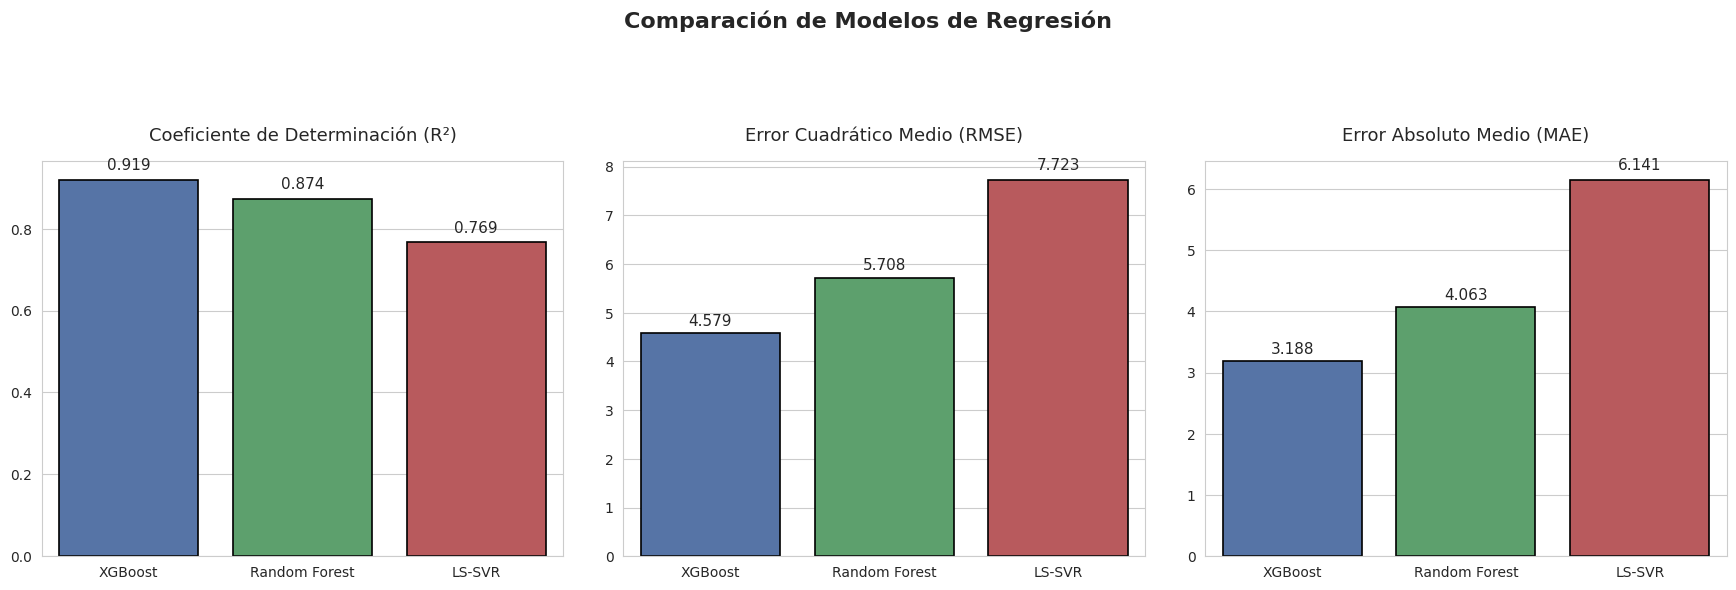


Resumen de M√©tricas de Rendimiento:


In [27]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_palette("colorblind")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.titlepad': 15,
    'axes.labelpad': 10
})

# Cargar datos y preparaci√≥n
X = data.drop('f¬¥c ', axis=1)
y = data['f¬¥c ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuraci√≥n de modelos
models = {
    "XGBoost": XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.9,
        random_state=42
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        bootstrap=True,
        random_state=42
    ),
    "LS-SVR": SVR(
        kernel='rbf',
        C=7.842342,
        gamma=0.027305,
        epsilon=0.000563
    )


}

# Evaluaci√≥n de modelos
results = {}
for name, model in models.items():
    if name == "LS-SVR":
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# graficos
metrics_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Modelo'})
melt_df = metrics_df.melt(id_vars='Modelo', var_name='M√©trica', value_name='Valor')


fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
plt.suptitle('Comparaci√≥n de Modelos de Regresi√≥n', y=1.02, fontsize=16, fontweight='semibold')
palette = {"XGBoost": "#4C72B0", "Random Forest": "#55A868", "LS-SVR": "#C44E52"}


for i, metric in enumerate(['R2', 'RMSE', 'MAE']):
    subset = metrics_df[['Modelo', metric]]

    # Gr√°fico de barras
    sns.barplot(
        x='Modelo',
        y=metric,
        data=subset,
        ax=ax[i],
        palette=palette,
        edgecolor='black',
        linewidth=1.2,
        saturation=0.8
    )

    # Personalizaci√≥n del subgr√°fico
    ax[i].set_title({
        'R2': 'Coeficiente de Determinaci√≥n (R¬≤)',
        'RMSE': 'Error Cuadr√°tico Medio (RMSE)',
        'MAE': 'Error Absoluto Medio (MAE)'
    }[metric], fontsize=13)

    ax[i].set_xlabel('')
    ax[i].set_ylabel('')


    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x() + p.get_width()/2., height * 1.02,
                 f'{height:.3f}',
                 ha='center', va='bottom', fontsize=11)



plt.tight_layout(pad=3.0)
plt.show()


print("\nResumen de M√©tricas de Rendimiento:")
display(metrics_df.set_index('Modelo').style
       .format({'R2': '{:.3f}', 'RMSE': '{:.3f}', 'MAE': '{:.3f}'})
       .background_gradient(cmap='Blues', axis=0)
       .set_caption("Resultados de Evaluaci√≥n en Conjunto de Prueba"))


In [28]:
sns.set_style("whitegrid")
sns.set_palette("tab10")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})


model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# C√ÅLCULO DE M√âTRICAS
residuals = y_test - y_pred
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
std_residual = np.std(residuals)



# GR√ÅFICA: VALORES REALES vs. PREDICCIONES

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=0.6,
    edgecolor='white',
    linewidth=0.5
)

max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='#404040', lw=2,)

# Bandas de ¬±1œÉ y ¬±2œÉ alrededor de la l√≠nea de identidad
for n_std in [1, 2]:
    plt.fill_between(
        [min_val, max_val],
        [min_val - n_std * std_residual, max_val - n_std * std_residual],
        [min_val + n_std * std_residual, max_val + n_std * std_residual],
        color='gray',
        alpha=0.2 - 0.05 * n_std,

    )


metric_text = (
    f'$R^2$: {r2:.3f}\n'
    f'RMSE: {rmse:.3f}\n'
    f'MAE: {mae:.3f}\n'
    f'¬±œÉ: {std_residual:.3f}'
)

plt.gca().text(
    0.05, 0.75, metric_text,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round')
)

# Etiquetas y t√≠tulo
plt.xlabel('Valor Real f¬¥c[MPa]', fontweight='bold')
plt.ylabel('Valor Predicho f¬¥c[MPa]', fontweight='bold')
plt.title('Valores Reales vs. Predichos - XGBoost', pad=15, fontweight='bold')

# Leyenda y layout
plt.legend(loc='upper left', frameon=True, framealpha=0.9)
plt.tight_layout()
plt.show()


<ipython-input-28-5961f27da825>:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', frameon=True, framealpha=0.9)
